In [6]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv("Mouse_metadata.csv")
print(mouse_metadata_df['Mouse ID'].count())
study_results_df = pd.read_csv("Study_results.csv")
print(study_results_df['Mouse ID'].count())

249
1893


In [8]:
#Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
combined_df = pd.merge(mouse_metadata_df, study_results_df, how="inner", on="Mouse ID")
duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
clean_df = combined_df.drop_duplicates("Mouse ID")

In [9]:
#Use the cleaned data for the remaining steps.

#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


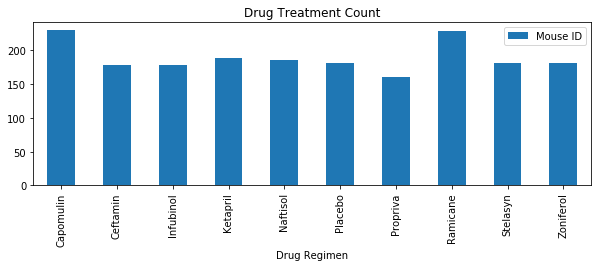

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the total number of measurements taken for each treatment regimen throughout the course of the study.

drug_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
#Alter the dataframe down to two columns
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

drugs_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()
drugs_df


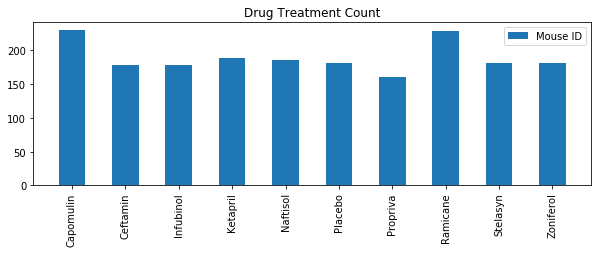

In [25]:

#plt.tight_layout()

plt.figure(figsize=(10, 3))
plt.bar(drug_data["Drug Regimen"], drug_data["Mouse ID"],width=0.5)
plt.title("Drug Treatment Count")
plt.xticks(rotation=90)
plt.legend(['Mouse ID'])



Text(0.5, 1.0, 'Male & Female Mice Percentage')

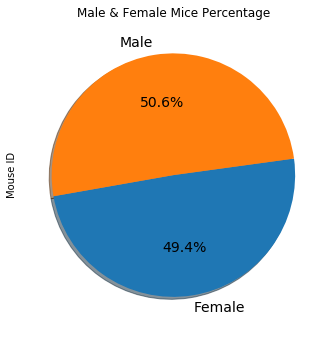

In [29]:
# Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.
gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()
gender_df = gender_df[["Sex","Mouse ID"]]
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")

Text(0, 0.5, 'Mouse ID')

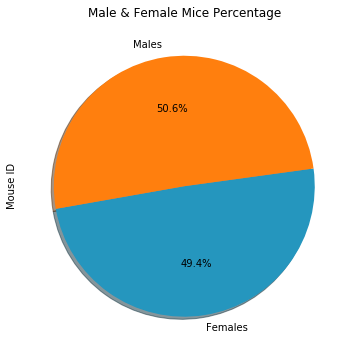

In [54]:
gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
labels = ["Females", "Males"]
colors = ["#2596be","#ff7f0e"]
plt.figure(figsize=(12,6))
plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=190)
#plt.axis("equal")
plt.title("Male & Female Mice Percentage")
plt.ylabel("Mouse ID")

In [73]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
best_regimes = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)


#Getting a smaller DF to work with
best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#best_regimes_data
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()




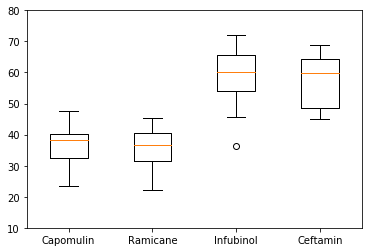

In [62]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

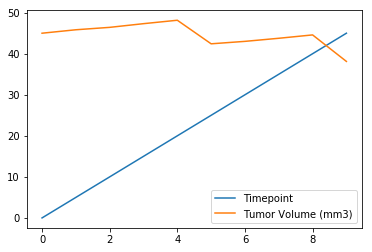

In [65]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
time_vs_tumor = combined_df[combined_df["Mouse ID"].isin(["j119"])]
time_vs_tumor

#Creating the DF for the data
time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

#Reseting Index on that Df
line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

#Recreating the DF after reseting the index
line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

#Plotting line
lines = line_plot_final.plot.line()

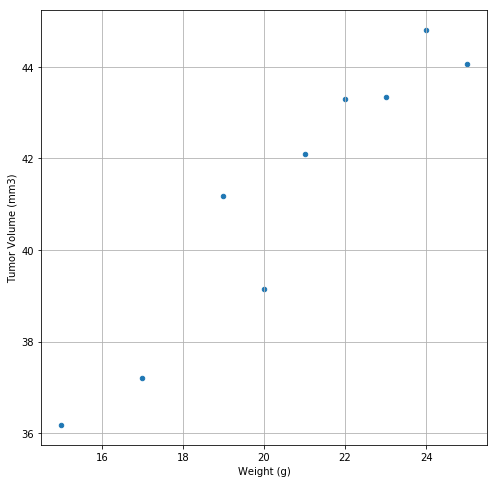

In [69]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
capomulin_scatter = combined_df[combined_df["Drug Regimen"].isin(["Capomulin"])]

#Creating first DF
capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

#Reseting Index
capomulin_scatter_plot = capomulin_scatter.reset_index()

#Sorting the capomulin variable by Weight (g) 
capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

#Getting the mean from the a groupby of Weight and Tumor Volume
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

#Creating the DF and reseting
capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

#Plotting
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

Text(0.5, 1.0, 'Weight Vs. Avg Tumor Vol')

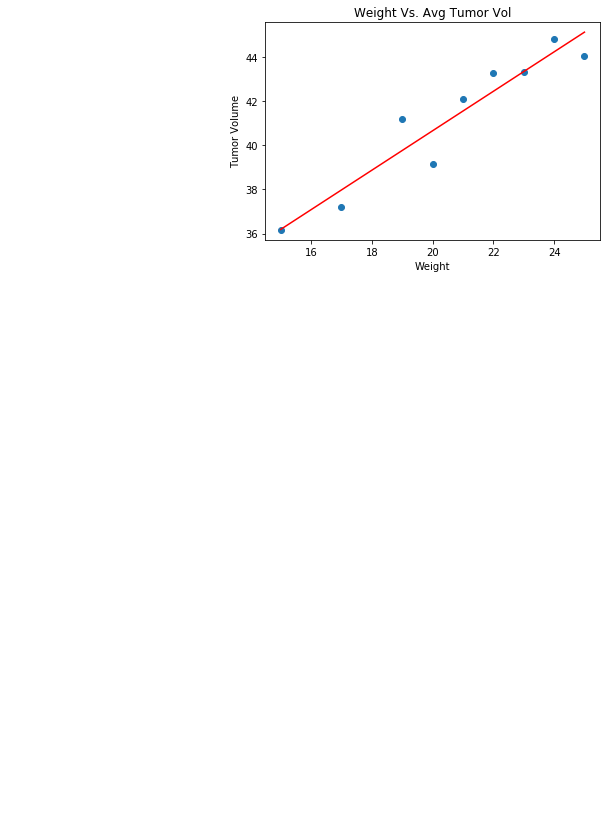

In [71]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#finding regression by x values times the slope and intercept
regress_values = x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#PLotting the Scatter
plt.scatter(x_values, y_values)

#PLotting the line
plt.plot(x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#Titles and Labels
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")